# STUDENT PERFORMACE DATA ANALYSIS - LINEAR REGRESSION MODEL BUILDING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [5]:
#this enables mutiple prints on the notebook console
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./input/StudentsPerformance.csv')

df.head(2).transpose()

,0,1
gender,female,female
race/ethnicity,group B,group C
parental level of education,bachelor's degree,some college
lunch,standard,standard
test preparation course,none,completed
math score,72,69
reading score,72,90
writing score,74,88


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


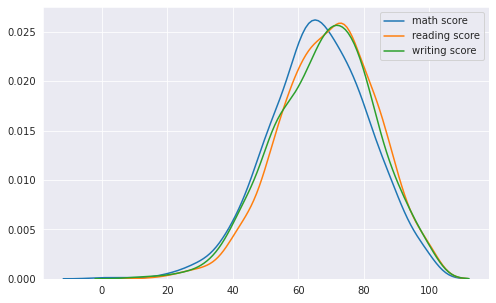

In [11]:
plt.rcParams['figure.figsize'] = (8,5)

sns.kdeplot(df['math score'])
sns.kdeplot(df['reading score'])
sns.kdeplot(df['writing score'])

In [12]:
# Let' create a new feature called total score 

df['total'] = df['math score']+df['reading score']+df['writing score']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total                        1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [15]:
# get all numeric columns

num_col = df.select_dtypes(exclude='object').columns

In [16]:
num_col

Index(['math score', 'reading score', 'writing score', 'total'], dtype='object')

In [17]:
df.describe()

,math score,reading score,writing score,total
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [20]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [21]:
df[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [22]:
for i in cat_col:
    print(i, '\n')
    print(df[i].value_counts())
    print("=="*15)

gender 

female    518
male      482
Name: gender, dtype: int64
race/ethnicity 

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
parental level of education 

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
lunch 

standard        645
free/reduced    355
Name: lunch, dtype: int64
test preparation course 

none         642
completed    358
Name: test preparation course, dtype: int64


In [26]:
# let's assign grade Based up on average score's obtained by .. (math,reading,writing)//3

df['grade'] = [0]*df.shape[0]

In [28]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total                        1000 non-null   int64 
 9   grade                        1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0
1,female,group C,some college,standard,completed,69,90,88,247,0
2,female,group B,master's degree,standard,none,90,95,93,278,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0
4,male,group C,some college,standard,none,76,78,75,229,0


In [33]:
def assign_grade(col):
    total = col
    
    if (total//3 > 79):
        return 'A'
    elif (total//3 > 59) and (total//3 < 80):
        return 'B'
    elif (total//3 > 35) and (total//3 < 60):
        return 'C'
    else:
        return 'D'

In [36]:
df['grade'] = df['total'].apply(assign_grade)

In [41]:
grades = df['grade'].value_counts()
print("Each grade count: \n ",grades)

Each grade count: 
  B    517
C    267
A    198
D     18
Name: grade, dtype: int64


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total                        1000 non-null   int64 
 9   grade                        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [42]:
def get_categorical_values(dataframe):
    df = dataframe
    cat_col = df.select_dtypes(include='object').columns
    for i in cat_col:
        print(i, '\n')
        print(df[i].value_counts())
        print("=="*15)
    return "**"*15

In [43]:
get_categorical_values(df)

gender 

female    518
male      482
Name: gender, dtype: int64
race/ethnicity 

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
parental level of education 

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
lunch 

standard        645
free/reduced    355
Name: lunch, dtype: int64
test preparation course 

none         642
completed    358
Name: test preparation course, dtype: int64
grade 

B    517
C    267
A    198
D     18
Name: grade, dtype: int64


'******************************'

([<matplotlib.patches.Wedge at 0x7fc3a270bc10>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'B'),
  Text(-0.6437647485904092, -0.891945597260465, 'C'),
  Text(0.8159159906278454, -0.7377540892721517, 'A'),
  Text(1.0982417081816183, -0.062170333844377326, 'D')])

Text(0.5, 1.0, 'GRADES')

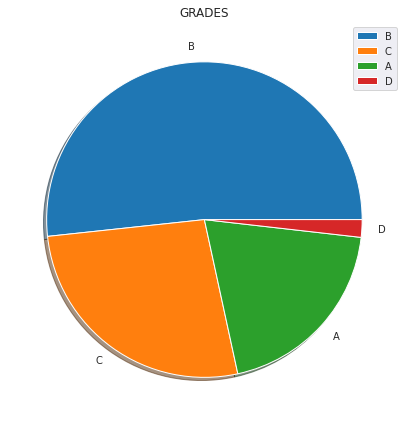

In [74]:
plt.rcParams['figure.figsize'] = (6,6)

plt.pie(df['grade'].value_counts().values, labels=df['grade'].value_counts().index,shadow=True)
plt.legend(['B','C','A','D'])
plt.title('GRADES')
plt.tight_layout()

In [75]:
# gender v/s different test score's 

# note : male's   are good at Math
# note : female's are good at reading and writing 

<Figure size 360x360 with 0 Axes>

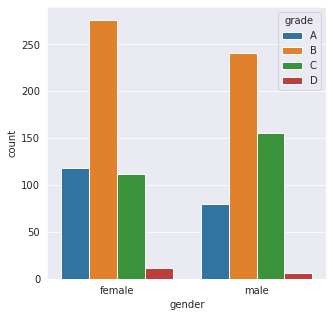

In [82]:
plt.figure(figsize=(5,5))

sns.countplot(data=df, x='gender', hue='grade',  hue_order=['A','B','C','D'])

In [78]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total', 'grade'],
      dtype='object')

In [83]:
df.pivot_table(values=['math score','reading score','writing score'],index='gender')

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Mean Different Test Scores : ')

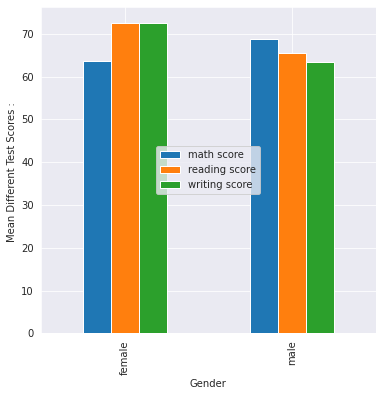

In [105]:
df.pivot_table(values=['math score','reading score','writing score'],index='gender').plot(kind='bar')
plt.xlabel("Gender")
plt.legend(loc='center left', bbox_to_anchor=(0.33, 0.5))
plt.ylabel("Mean Different Test Scores : ")

In [96]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total', 'grade'],
      dtype='object')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Mean Different Test Scores : ')

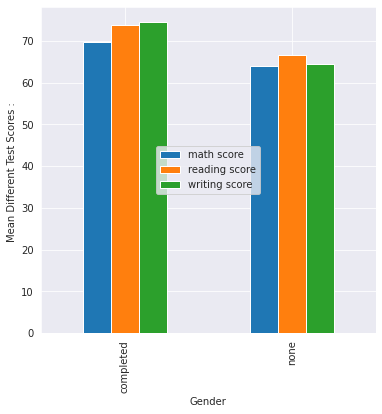

In [104]:
df.pivot_table(index = "test preparation course",values = ["math score","reading score","writing score"]).plot(kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(0.33, 0.5))
plt.xlabel("Gender")
plt.ylabel("Mean Different Test Scores : ")

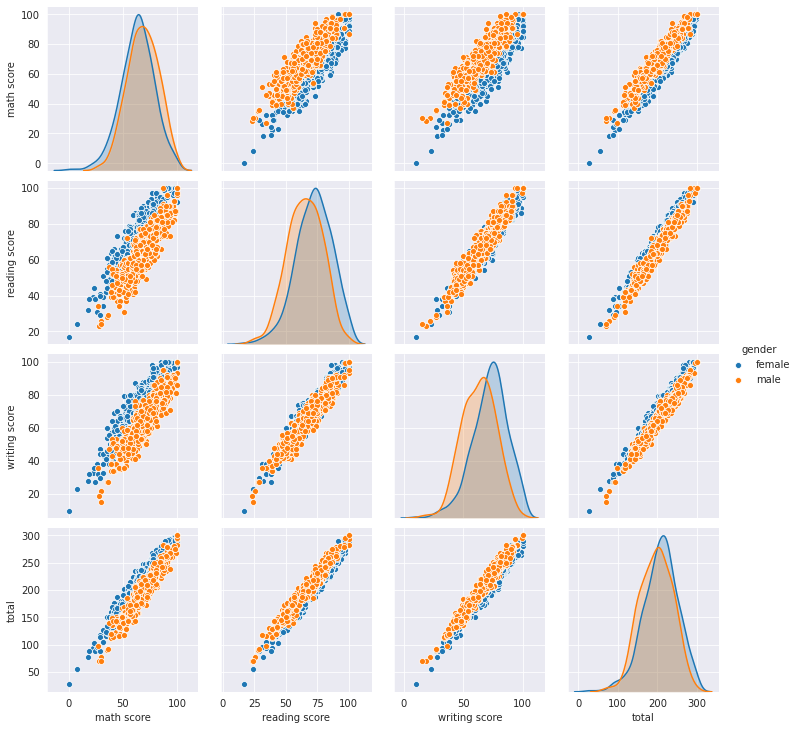

In [108]:
# let's see how gender affects different test score's
# This shows Regression task, we can see the linear relationship among the featues.

sns.pairplot(df,hue='gender')

In [110]:
gradeA_students = df[df['grade'] == 'A']

In [111]:
gradeA_students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,grade
1,female,group C,some college,standard,completed,69,90,88,247,A
2,female,group B,master's degree,standard,none,90,95,93,278,A
6,female,group B,some college,standard,completed,88,95,92,275,A
16,male,group C,high school,standard,none,88,89,86,263,A
34,male,group E,some college,standard,none,97,87,82,266,A


[Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'some high school'),
 Text(0, 0, "bachelor's degree")]

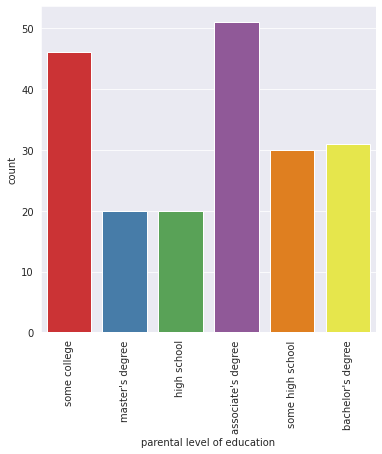

In [119]:
cntplt = sns.countplot(data=gradeA_students, x='parental level of education', palette='Set1')
cntplt.set_xticklabels(cntplt.get_xticklabels(),rotation=90)

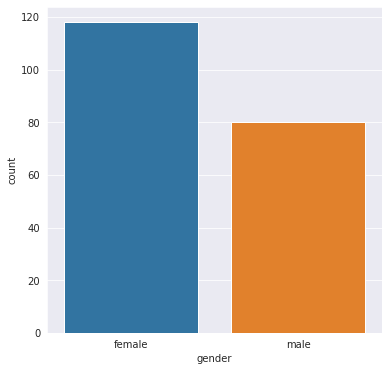

In [120]:
sns.countplot(data=gradeA_students, x='gender')

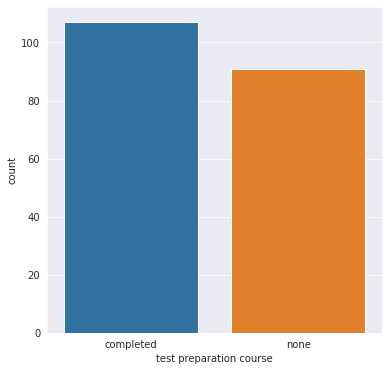

In [122]:
sns.countplot(data=gradeA_students, x='test preparation course')

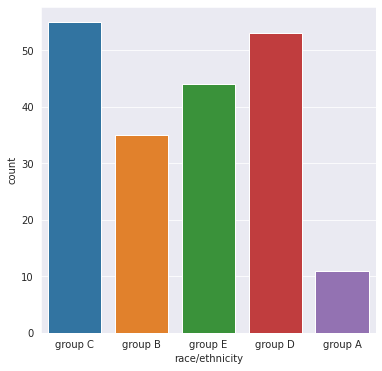

In [123]:
sns.countplot(data=gradeA_students, x='race/ethnicity')

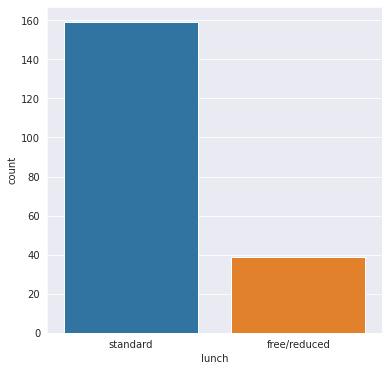

In [124]:
sns.countplot(data=gradeA_students, x='lunch')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total                        1000 non-null   int64 
 9   grade                        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix

In [128]:
scopy = df.copy()
scopy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,B
1,female,group C,some college,standard,completed,69,90,88,247,A
2,female,group B,master's degree,standard,none,90,95,93,278,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,C
4,male,group C,some college,standard,none,76,78,75,229,B


In [129]:
scopy =pd.get_dummies(scopy,drop_first = True)

In [130]:
scopy.head()

,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,grade_B,grade_C,grade_D
0,72,72,74,218,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0
1,69,90,88,247,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,90,95,93,278,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0
3,47,57,44,148,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,76,78,75,229,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0


In [131]:
X = scopy.drop("total",axis = 1)
y = scopy["total"]

In [132]:
lr = LinearRegression()

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [134]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
print("Test set Perfomance :  ")
n = len(X_test)
k = X_test.shape[1]

predictions = lr.predict(X_test)

r2 = r2_score(predictions,y_test)

adjusted_r2_score = (1- (((1 - r2)*(n-1))/(n-k-1)))
print("r2_score value : ",r2)
print("adjusted_r2_score value : ",adjusted_r2_score)
print("MSE Value : ",mean_squared_error(predictions,y_test))

Test set Perfomance :  
r2_score value :  1.0
adjusted_r2_score value :  1.0
MSE Value :  1.0617436695550643e-27


In [148]:
# actual vs predicted

In [149]:
res  = pd.DataFrame(y_test,dtype = int)
res.rename(columns = {"total":"actual"},inplace = True)
res["predicted"] = predictions
res["predicted"] =  res["predicted"].astype(int)

In [150]:
res.head()

,actual,predicted
521,261,261
737,192,192
740,225,225
660,224,224
411,245,245


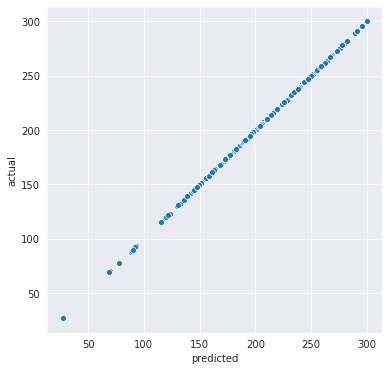

In [151]:
# Let's see the result Visually .

sns.scatterplot(res["predicted"],res["actual"])